## importing required libraries and loading dataset

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
df=pd.read_csv("/content/drive/MyDrive/Concept and techologies of AI/diabetes_binary_5050split_health_indicators_BRFSS2015.csv", encoding="latin1")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


##  Initial Data Exploration
Checking dataset structure, missing values and data types.



In [117]:
df.isna().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

##  Data Cleaning

- Removing extra spaces and formatting column names.


In [119]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['diabetes_binary', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')

###  Removing Duplicate Records
Duplicate patient records are removed.


In [120]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


1635


##  Dataset Summary
Displaying dataset structure and statistical summary.


In [121]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(69057, 22)
   diabetes_binary  highbp  highchol  cholcheck   bmi  smoker  stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   heartdiseaseorattack  physactivity  fruits  ...  anyhealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   nodocbccost  genhlth  menthlth  physhlth  diffwalk  sex   age  education  \
0          0.0      3.0       5.0      30.0       0.0  

## Class Distribution Visualization
Visualizing distribution of liver disease classes.


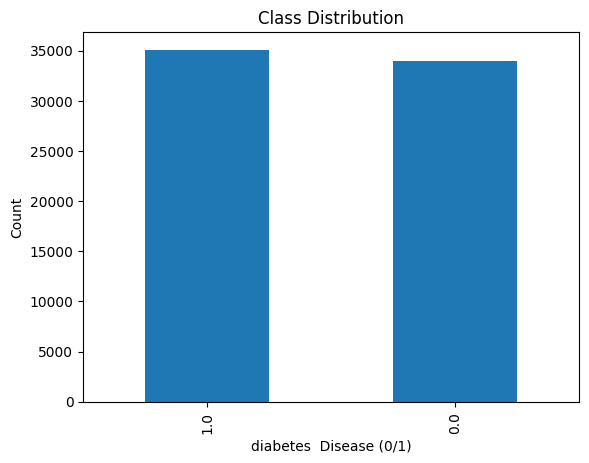

In [122]:
df['diabetes_binary'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("diabetes  Disease (0/1)")
plt.ylabel("Count")
plt.show()

## Age Based Analysis
Comparing diabetes distribution by Age.


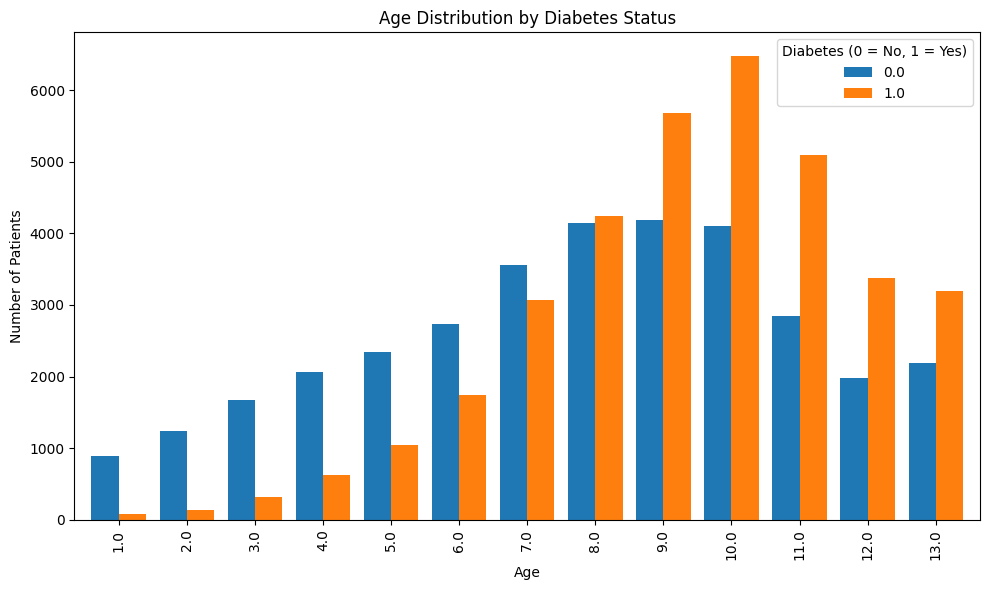

In [ ]:
age_diabetes = df.groupby('age')['diabetes_binary'].value_counts().unstack()

# Plot
age_diabetes.plot(
    kind='bar',
    figsize=(10,6),
    width=0.8
)

plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.legend(title="Diabetes (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()

BMI Analysis

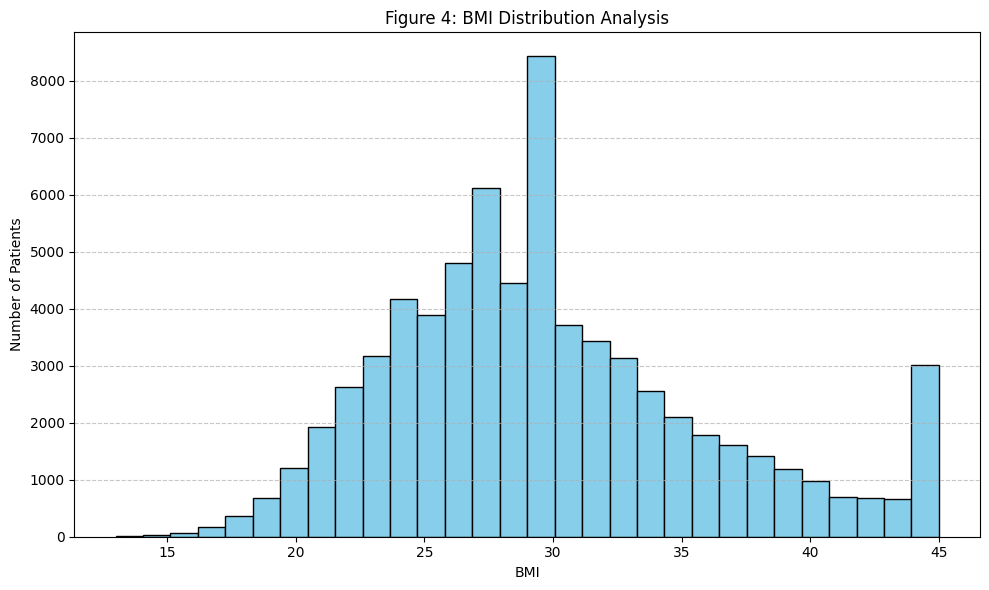

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['bmi'], bins=30, color='skyblue', edgecolor='black')
plt.title("Figure 4: BMI Distribution Analysis")
plt.xlabel("BMI")
plt.ylabel("Number of Patients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

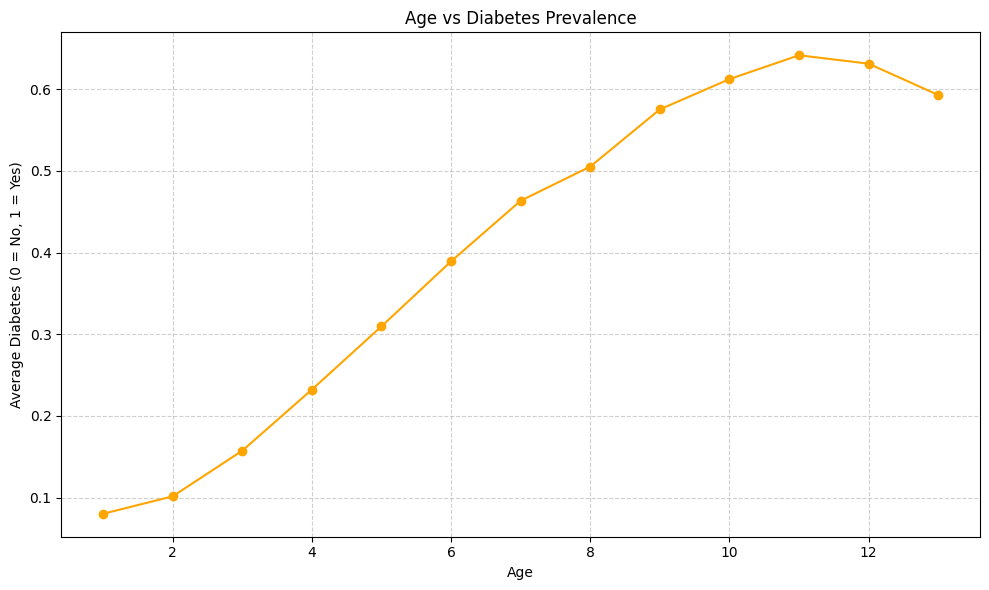

In [ ]:
age_diabetes = df.groupby('age')['diabetes_binary'].mean()

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(age_diabetes.index, age_diabetes.values, marker='o', color='orange')
plt.title("Age vs Diabetes Prevalence")
plt.xlabel("Age")
plt.ylabel("Average Diabetes (0 = No, 1 = Yes)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##  Correlation Analysis
Identifying relationship between features and target variable.


In [123]:
correlation=df.corr(numeric_only=True)['diabetes_binary']
print(correlation)

diabetes_binary         1.000000
highbp                  0.372048
highchol                0.281399
cholcheck               0.118900
bmi                     0.285643
smoker                  0.075853
stroke                  0.122727
heartdiseaseorattack    0.207229
physactivity           -0.150281
fruits                 -0.044560
veggies                -0.072181
hvyalcoholconsump      -0.098709
anyhealthcare           0.027034
nodocbccost             0.036145
genhlth                 0.396571
menthlth                0.080688
physhlth                0.206868
diffwalk                0.267082
sex                     0.042538
age                     0.274550
education              -0.158522
income                 -0.212846
Name: diabetes_binary, dtype: float64


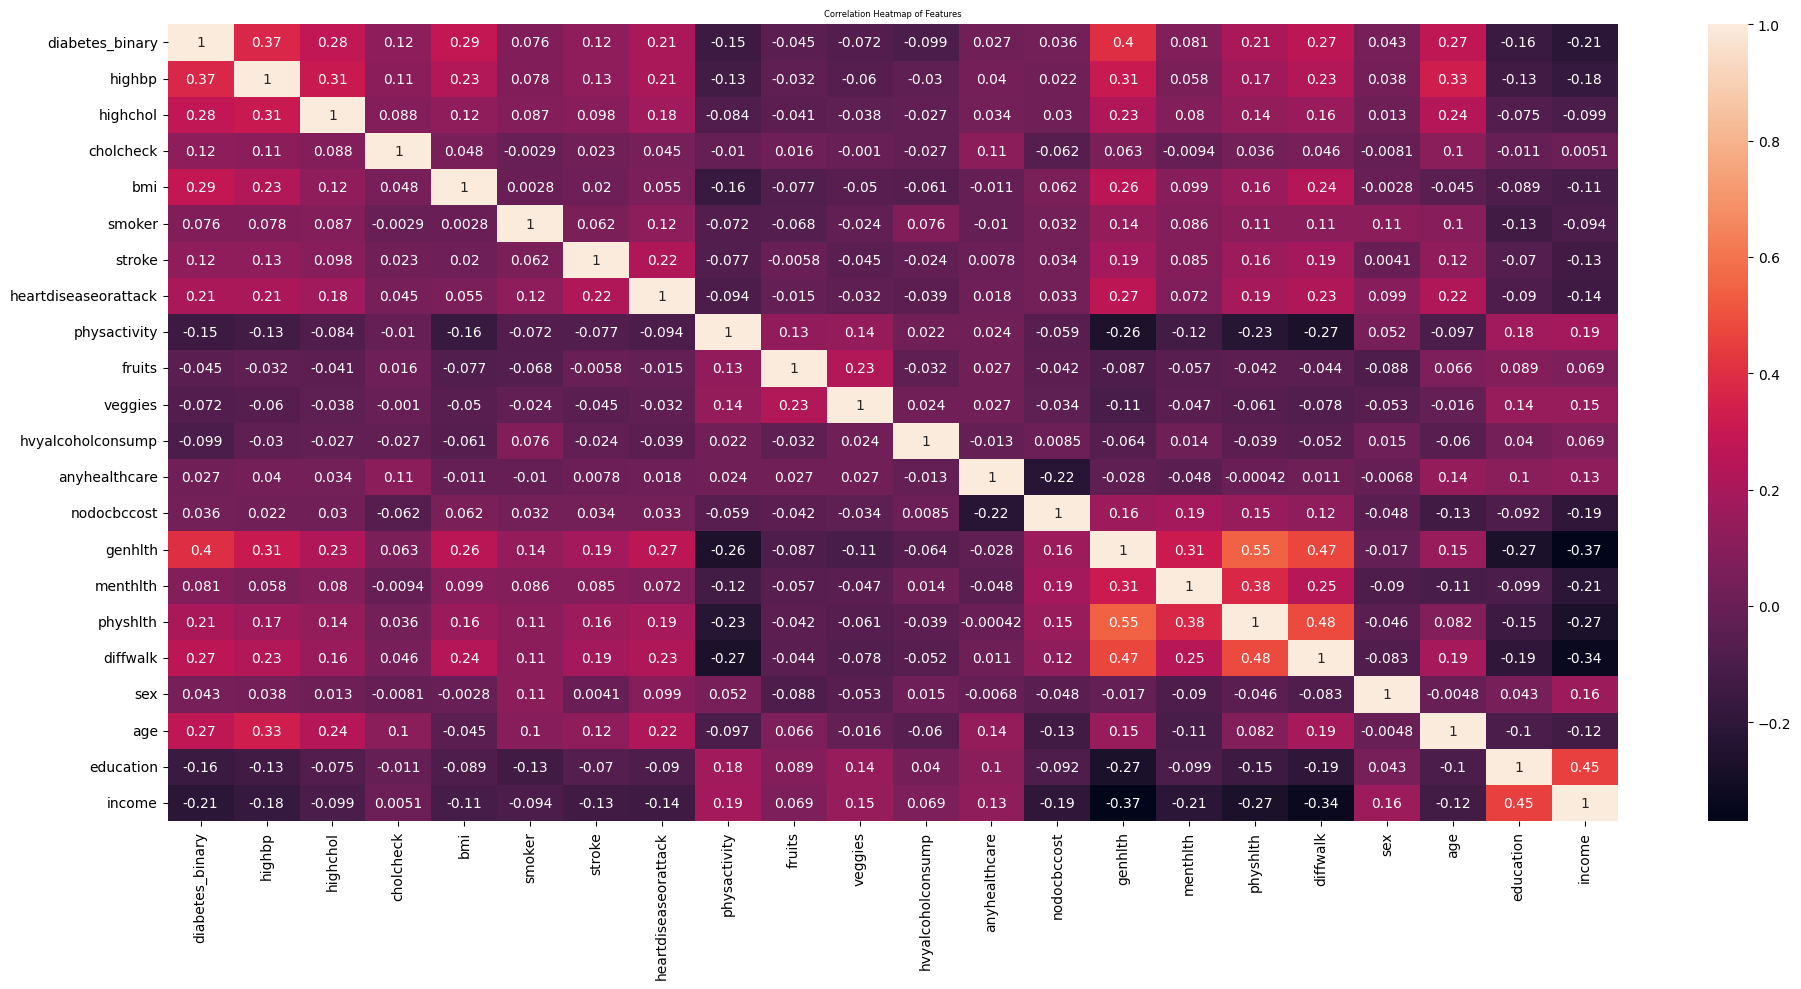

In [124]:
plt.figure(figsize=(20, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap of Features', fontsize=6)
plt.tight_layout()
plt.show()

### Outlier Detection
Boxplots are used to visualize outliers in each numerical feature before treatment.

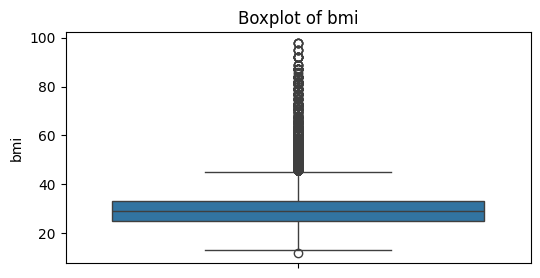

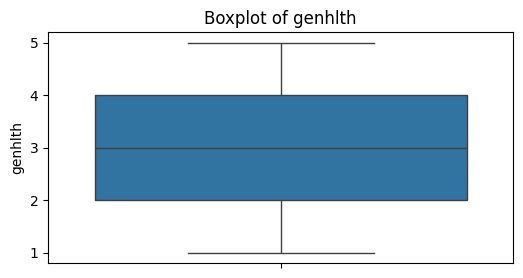

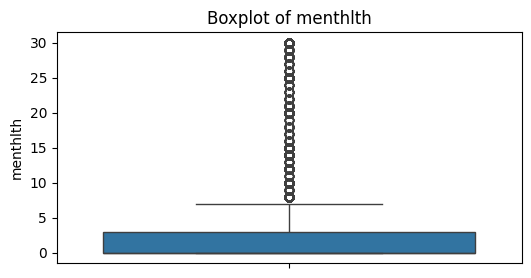

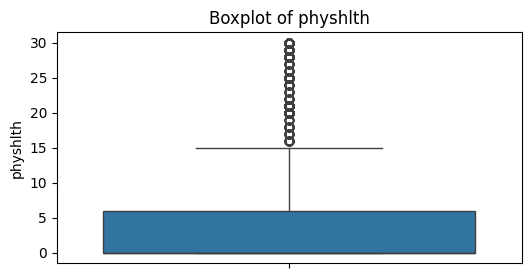

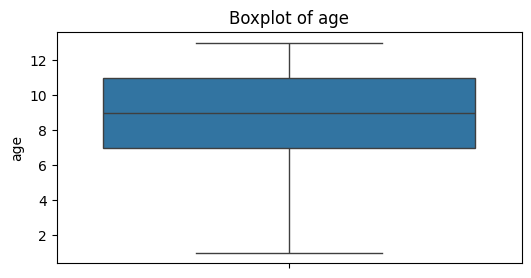

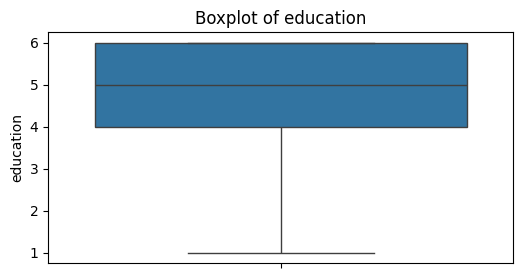

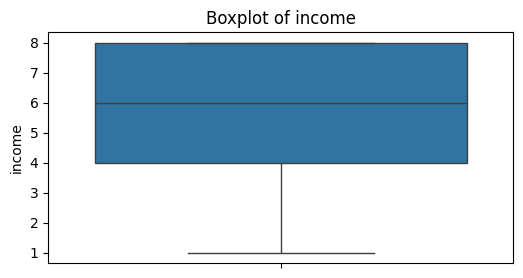

In [125]:
numeric_cols = ['bmi','genhlth','menthlth','physhlth','age','education','income']

import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Outlier Handling
Outliers are detected using IQR method and clipped within statistical limits.


In [126]:
numeric_cols = ['bmi','genhlth','menthlth','physhlth','age','education','income']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])


## Feature Selection and Target Separation



In [130]:
# Drop the original target column (diabetes_012)
x = df.drop(columns=['diabetes_binary'])
y = df['diabetes_binary']


## Train-Test Split and Feature Scaling
Dataset is divided into training and testing sets. StandardScaler is used for normalization.


In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##  Multi Layer Perceptron Model
Training neural network classifier and evaluating performance.


In [132]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=300,
    early_stopping=True,
    random_state=42
)
mlp.fit(x_train_scaled,y_train)
y_train_pred_mlp=mlp.predict(x_train_scaled)
y_test_pred_mlp=mlp.predict(x_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_mlp))

Confusion Matrix:
[[4738 1985]
 [1348 5741]]


###  MLP Evaluation


In [133]:
mlp_train_accuracy = accuracy_score(y_train, y_train_pred_mlp)
mlp_train_precision = precision_score(y_train, y_train_pred_mlp)
mlp_train_recall = recall_score(y_train, y_train_pred_mlp)
mlp_train_f1 = f1_score(y_train, y_train_pred_mlp)

mlp_test_accuracy = accuracy_score(y_test, y_test_pred_mlp)
mlp_test_precision = precision_score(y_test, y_test_pred_mlp)
mlp_test_recall = recall_score(y_test, y_test_pred_mlp)
mlp_test_f1 = f1_score(y_test, y_test_pred_mlp)

print("Training Performance:")
print("Accuracy :", mlp_train_accuracy)
print("Precision:", mlp_train_precision)
print("Recall   :", mlp_train_recall)
print("F1-score :", mlp_train_f1)

print("\nTest Performance:")
print("Accuracy :", mlp_test_accuracy)
print("Precision:", mlp_test_precision)
print("Recall   :", mlp_test_recall)
print("F1-score :", mlp_test_f1)


Training Performance:
Accuracy : 0.7531541315956195
Precision: 0.7311416347669444
Recall   : 0.8115181376749501
F1-score : 0.7692359759708943

Test Performance:
Accuracy : 0.7586880973066898
Precision: 0.7430753300543619
Recall   : 0.8098462406545351
F1-score : 0.7750253121835977


##  Logistic Regression Model


In [134]:
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_train_pred_lr=lr.predict(x_train_scaled)
y_test_pred_lr=lr.predict(x_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr))

Confusion Matrix:
[[4902 1821]
 [1608 5481]]


In [135]:
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_precision_lr = precision_score(y_train, y_train_pred_lr)
train_recall_lr = recall_score(y_train, y_train_pred_lr)
train_f1_lr = f1_score(y_train, y_train_pred_lr)

test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr)
test_recall_lr = recall_score(y_test, y_test_pred_lr)
test_f1_lr = f1_score(y_test, y_test_pred_lr)

print("Training Performance:")
print("Accuracy :", train_accuracy_lr)
print("Precision:", train_precision_lr)
print("Recall   :", train_recall_lr)
print("F1-score :", train_f1_lr)

print("\nTest Performance:")
print("Accuracy :", test_accuracy_lr)
print("Precision:", test_precision_lr)
print("Recall   :", test_recall_lr)
print("F1-score :", test_f1_lr)



Training Performance:
Accuracy : 0.7442483482668115
Precision: 0.7368834272060079
Recall   : 0.7707440731219651
F1-score : 0.7534335026089385

Test Performance:
Accuracy : 0.751737619461338
Precision: 0.7506162695152013
Recall   : 0.7731696995344901
F1-score : 0.7617260787992496


##  Decision Tree


In [136]:
dt=DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(x_train,y_train)
y_train_pred_dt=dt.predict(x_train)
y_test_pred_dt=dt.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))

Confusion Matrix:
[[4682 2041]
 [1532 5557]]


In [137]:
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
train_precision_dt = precision_score(y_train, y_train_pred_dt)
train_recall_dt = recall_score(y_train, y_train_pred_dt)
train_f1_dt = f1_score(y_train, y_train_pred_dt)

test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt)
test_recall_dt = recall_score(y_test, y_test_pred_dt)
test_f1_dt = f1_score(y_test, y_test_pred_dt)

print("Training Performance:")
print("Accuracy :", train_accuracy_dt)
print("Precision:", train_precision_dt)
print("Recall   :", train_recall_dt)
print("F1-score :", train_f1_dt)

print("\nTest Performance:")
print("Accuracy :", test_accuracy_dt)
print("Precision:", test_precision_dt)
print("Recall   :", test_recall_dt)
print("F1-score :", test_f1_dt)

Training Performance:
Accuracy : 0.7621866232238211
Precision: 0.7418358053603955
Recall   : 0.8143030562696373
F1-score : 0.7763820806100218

Test Performance:
Accuracy : 0.7413119026933102
Precision: 0.7313766780731772
Recall   : 0.7838905346311187
F1-score : 0.7567236331449582


## Hyperparameter Tuning
Optimizing Logistic Regression and Random Forest models using RandomizedSearchCV.


### logistic Regression

In [138]:
param_grid_lr= {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'solver': ['liblinear']
}
random_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_grid_lr, cv=5, scoring='accuracy',random_state=42)
random_lr.fit(x_train_scaled, y_train)
best_model_lr = random_lr.best_estimator_
y_train_pred_tuned_lr = best_model_lr.predict(x_train_scaled)
y_test_pred_tuned_lr = best_model_lr.predict(x_test_scaled)
best_params_lr=random_lr.best_params_
print("Best Hyperparameters:", best_params_lr)

print("Best CV Accuracy:", random_lr.best_score_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_tuned_lr))

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'fit_intercept': False, 'C': 10}
Best CV Accuracy: 0.7441216399674179
Confusion Matrix:
[[4893 1830]
 [1590 5499]]


In [139]:
train_accuracy_tuned_lr = accuracy_score(y_train, y_train_pred_tuned_lr)
train_precision_tuned_lr = precision_score(y_train, y_train_pred_tuned_lr)
train_recall_tuned_lr = recall_score(y_train, y_train_pred_tuned_lr)
train_f1_tuned_lr = f1_score(y_train, y_train_pred_tuned_lr)

test_accuracy_tuned_lr = accuracy_score(y_test, y_test_pred_tuned_lr)
test_precision_tuned_lr = precision_score(y_test, y_test_pred_tuned_lr)
test_recall_tuned_lr = recall_score(y_test, y_test_pred_tuned_lr)
test_f1_tuned_lr = f1_score(y_test, y_test_pred_tuned_lr)

print("Training Performance:")
print("Accuracy :", train_accuracy_tuned_lr)
print("Precision:", train_precision_tuned_lr)
print("Recall   :", train_recall_tuned_lr)
print("F1-score :", train_f1_tuned_lr)

print("\nTest Performance:")
print("Accuracy :", test_accuracy_tuned_lr)
print("Precision:", test_precision_tuned_lr)
print("Recall   :", test_recall_tuned_lr)
print("F1-score :", test_f1_tuned_lr)

Training Performance:
Accuracy : 0.7440492352249072
Precision: 0.7360912495743956
Recall   : 0.7718866038274779
F1-score : 0.7535640837951828

Test Performance:
Accuracy : 0.7523892267593397
Precision: 0.7503069995906673
Recall   : 0.7757088446889547
F1-score : 0.762796504369538


### Decision Tree

In [140]:
param_dist_dt = {
    'criterion': [ 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [10, 20, 30, 50],
    'min_samples_leaf': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}
random_dt=RandomizedSearchCV(estimator=dt, param_distributions=param_dist_dt, cv=5, scoring='accuracy',random_state=42)
random_dt.fit(x_train_scaled, y_train)
best_model_dt = random_dt.best_estimator_
y_train_pred_tuned_dt=best_model_dt.predict(x_train_scaled)
y_test_pred_tuned_dt=best_model_dt.predict(x_test_scaled)
best_params_dt=random_dt.best_params_
print("Best Hyperparameters:", best_params_dt)
print("Best CV Accuracy:", random_dt.best_score_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_tuned_dt))

Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'log_loss'}
Best CV Accuracy: 0.7269617159923975
Confusion Matrix:
[[4565 2158]
 [1482 5607]]


In [141]:
train_accuracy_tuned_dt = accuracy_score(y_train, y_train_pred_tuned_dt)
train_precision_tuned_dt = precision_score(y_train, y_train_pred_tuned_dt)
train_recall_tuned_dt = recall_score(y_train, y_train_pred_tuned_dt)
train_f1_tuned_dt = f1_score(y_train, y_train_pred_tuned_dt)

test_accuracy_tuned_dt = accuracy_score(y_test, y_test_pred_tuned_dt)
test_precision_tuned_dt = precision_score(y_test, y_test_pred_tuned_dt)
test_recall_tuned_dt = recall_score(y_test, y_test_pred_tuned_dt)
test_f1_tuned_dt = f1_score(y_test, y_test_pred_tuned_dt)

print("Training Performance:")
print("Accuracy :", train_accuracy_tuned_dt)
print("Precision:", train_precision_tuned_dt)
print("Recall   :", train_recall_tuned_dt)
print("F1-score :", train_f1_tuned_dt)

print("\nTest Performance:")
print("Accuracy :", test_accuracy_tuned_dt)
print("Precision:", test_precision_tuned_dt)
print("Recall   :", test_recall_tuned_dt)
print("F1-score :", test_f1_tuned_dt)

Training Performance:
Accuracy : 0.7370802787582587
Precision: 0.7150604523558873
Recall   : 0.8003070551271065
F1-score : 0.7552859910706764

Test Performance:
Accuracy : 0.7364610483637417
Precision: 0.7220862846104315
Recall   : 0.7909437156157427
F1-score : 0.7549481621112158


## Feature Importance Selection
Decision Tree is used to identify most important features.


In [150]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
n_features_to_select = 6
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)
x_train_top = rfe.fit_transform(x_train, y_train)
x_test_top = rfe.transform(x_test)


feature_ranking = rfe.ranking_
feature_support = rfe.support_

feature_names = x_train.columns[rfe.support_]
print("features ",feature_names)

features  Index(['highbp', 'bmi', 'genhlth', 'physhlth', 'age', 'income'], dtype='object')


In [151]:
lr=LogisticRegression(max_iter=300,random_state=42)
lr.fit(x_train_top,y_train)
y_train_pred=lr.predict(x_train_top)
y_test_pred=lr.predict(x_test_top)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[4851 1872]
 [1622 5467]]


In [152]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)

Training Performance:
Accuracy : 0.7335324463752376
Precision: 0.7264546477144902
Recall   : 0.7609254498714653
F1-score : 0.7432906094690034

Test Performance:
Accuracy : 0.7470315667535476
Precision: 0.7449243766180679
Recall   : 0.7711948088587953
F1-score : 0.7578319933462712


In [153]:
dt=DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(x_train_top,y_train)
y_train_pred=dt.predict(x_train_top)
y_test_pred=dt.predict(x_test_top)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[4791 1932]
 [1642 5447]]


In [154]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)

Training Performance:
Accuracy : 0.7488098470449814
Precision: 0.7389010989010989
Recall   : 0.7802413596115395
F1-score : 0.7590087352169911

Test Performance:
Accuracy : 0.741239501882421
Precision: 0.7381759045941184
Recall   : 0.7683735364649457
F1-score : 0.7529720763063312


##  Model Retraining Using Top Features
Models are retrained using selected important features.


In [155]:
lr_final=LogisticRegression(**best_params_lr,class_weight='balanced', random_state=42)
lr_final.fit(x_train_top,y_train)
y_train_pred_final_lr=lr_final.predict(x_train_top)
y_test_pred_final_lr=lr_final.predict(x_test_top)
lr_train_acc = accuracy_score(y_train, y_train_pred_final_lr)
lr_train_precision = precision_score(y_train, y_train_pred_final_lr)
lr_train_recall = recall_score(y_train, y_train_pred_final_lr)
lr_train_f1 = f1_score(y_train, y_train_pred_final_lr)

lr_test_acc = accuracy_score(y_test, y_test_pred_final_lr)
lr_test_precision = precision_score(y_test, y_test_pred_final_lr)
lr_test_recall = recall_score(y_test, y_test_pred_final_lr)
lr_test_f1 = f1_score(y_test, y_test_pred_final_lr)
lr_cv_score=random_lr.best_score_
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_final_lr))

Confusion Matrix:
[[4456 2267]
 [1860 5229]]


In [156]:
dt_final=DecisionTreeClassifier(**best_params_dt, random_state=42)
dt_final.fit(x_train_top,y_train)
y_train_pred_final_dt=dt_final.predict(x_train_top)
y_test_pred_final_dt=dt_final.predict(x_test_top)
dt_train_acc = accuracy_score(y_train, y_train_pred_final_dt)
dt_train_precision = precision_score(y_train, y_train_pred_final_dt)
dt_train_recall = recall_score(y_train, y_train_pred_final_dt)
dt_train_f1 = f1_score(y_train, y_train_pred_final_dt)

dt_test_acc = accuracy_score(y_test, y_test_pred_final_dt)
dt_test_precision = precision_score(y_test, y_test_pred_final_dt)
dt_test_recall = recall_score(y_test, y_test_pred_final_dt)
dt_test_f1 = f1_score(y_test, y_test_pred_final_dt)

dt_cv_score=random_dt.best_score_
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_final_dt))

Confusion Matrix:
[[4681 2042]
 [1659 5430]]


## Final Model Comparison
Comparing performance metrics of optimized models.


In [157]:
comparison_df = pd.DataFrame({
    'Model': ['MLP', 'Logistic Regression (Classical)', 'Decision Tree (Classical)',
              'Logistic Regression (Final)', 'Decision Tree (Final)'],
    'Features Used': [x_test_scaled.shape[1], x_test_scaled.shape[1], x_test.shape[1],
                      n_features_to_select, n_features_to_select],
    'CV Score': ['-', '-', '-', round(lr_cv_score, 2), round(dt_cv_score, 2)],
    'Accuracy': [round(mlp_test_accuracy, 2), round(test_accuracy_lr, 2), round(test_accuracy_dt, 2),
                 round(lr_test_acc, 2), round(dt_test_acc, 2)],
    'Precision': [round(mlp_test_precision, 2), round(test_precision_lr, 2), round(test_precision_dt, 2),
                  round(lr_test_precision, 2), round(dt_test_precision, 2)],
    'Recall': [round(mlp_test_recall, 2), round(test_recall_lr, 2), round(test_recall_dt, 2),
               round(lr_test_recall, 2), round(dt_test_recall, 2)],
    'F1-Score': [round(mlp_test_f1, 2), round(test_f1_lr, 2), round(test_f1_dt, 2),
                 round(lr_test_f1, 2), round(dt_test_f1, 2)]
})

print(" Model Comparison Table:")
print(comparison_df)

 Model Comparison Table:
                             Model  Features Used CV Score  Accuracy  \
0                              MLP             21        -      0.76   
1  Logistic Regression (Classical)             21        -      0.75   
2        Decision Tree (Classical)             21        -      0.74   
3      Logistic Regression (Final)              6     0.74      0.70   
4            Decision Tree (Final)              6     0.73      0.73   

   Precision  Recall  F1-Score  
0       0.74    0.81      0.78  
1       0.75    0.77      0.76  
2       0.73    0.78      0.76  
3       0.70    0.74      0.72  
4       0.73    0.77      0.75  
